In [1]:
# load libraries

import numpy as np

In [2]:
# Create Data

num = 500
X = np.arange(num).reshape(100, 5)
y = np.arange(X.shape[0])

In [3]:
# scale X

xd       = X.copy()
m        = xd.shape[0]
xd       = np.hstack([np.ones((m, 1)), xd])
x_mean   = xd[:, 1:].mean(axis=0)
x_std    = xd[:, 1:].std(axis=0)
xd[:, 1:]=(xd[:, 1:] - x_mean) / x_std

In [4]:
# scale y

y_mean = y.mean()
y_std  = y.std()
yd     = (y - y_mean) / y_std

In [5]:
# msk split

val_size       = 0.8
msk            = np.random.rand(len(xd)) < val_size

In [6]:
# split train, split

X_train, X_val = xd[msk], xd[~msk]
y_train, y_val = yd[msk], yd[~msk]

In [7]:
# Hyper parameter

lr  = 0.01
eps = 1000

In [8]:
#m_samples, n_features in X_train

m_train, n_train = X_train.shape

In [9]:
# theta

theta = np.zeros(n_train)

In [10]:
# history

lss_hist_train = list()

In [11]:
# model

for i in range(eps):
    yp       = X_train.dot(theta)

    err      = yp - y_train
    
    lss      = np.mean(err ** 2)
    lss_hist_train.append(lss)

    grad = 2 / m_train * X_train.T.dot(err)
    theta   -= lr * grad

yp_train = X_train.dot(theta)
err_train= yp_train - y_train

yp_val   = X_val.dot(theta)
err_val  = yp_val - y_val

lss_val  = np.mean(err_val  ** 2)
lss_train= np.mean(err_train **2)

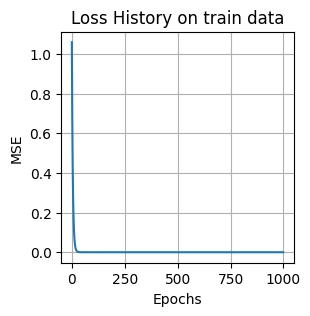

In [12]:
#load matplotlib.pyplot
import matplotlib.pyplot as plt

#plot lss train hist
plt.figure(figsize=(3, 3))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Loss History on train data')
plt.grid(True)
plt.plot(lss_hist_train)
plt.show()

In [13]:
print(f'lss val: {lss_val}', f'lss train: {lss_train}')

lss val: 2.7556362260776597e-22 lss train: 2.7183916884777035e-22
